# A Simple SEIRD Model for COVID-19

This notebook presents a simple network-based model of COVID-19. The model is was prompted by the UK proposal to combat COVID-19 through herd immunity of the younger population, in order to protect the older and immunodepressed population.

The main question this model is studying is: **is herd immunity an effective strategy to minimize loss of life among at-risk individuals?**

## Probabilistic Finite State Machine

The model considers the dynamics of $N$ individuals switching across states, as shown in the below diagram:

![State diagram](doc/states.png)

The states are as follows:
* **Susceptible** ($S$): Individuals who do not have the disease. Each day, they switch to **Exposed** if in contact with an exposed or infected individual, according to a probability that depends on the state of that individual ($p_\text{contagion,e}$ or $p_\text{contagion,i}$).
* **Exposed** ($E$): Individuals who have the disease and can transmit it, but are asymptomatic. This lasts on average $t_\text{incubation}$ days, after which they switch to **Infected**.
* **Infected** ($I$): Individuals who are showing symptoms. This lasts on average $t_\text{symptomatic}$ days. Subsequently, individuals switch to either **Recovered** or **Dead** depending on probability $p_\text{recover}$ or $p_\text{die}$ (with $p_\text{recover} + p_\text{die} = 1$).
* **Recovered** ($R$): Alive individuals who are not sick nor susceptible.
* **Dead** ($D$): Dead individuals.

## Network Model

To simulate social network effects, this model uses a static [Barabasi-Albert scale-free network](https://en.wikipedia.org/wiki/Barab%C3%A1si%E2%80%93Albert_model). After the network is built, a fraction $p_\text{die}$ of the nodes is randomly marked as the nodes who will die if infected.

## Experiments

In the code below, we perform 100 Monte Carlo simulations and show a graph with the average and standard deviation of the number of agents per state over time (time is discrete and corresponds to a day). No parameter fitting has been performed yet.

In [1]:
include("src/SEIRD.jl");
using Printf

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
 Resolving package versions...
  Updating `~/.julia/environments/v1.3/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.3/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.3/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.3/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.3/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.3/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.3/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.3/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.3/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.3/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.ju

In [2]:
function g_scalefree(params)
    # https://en.wikipedia.org/wiki/Barab%C3%A1si%E2%80%93Albert_model
    n  = params[1]
    n0 = params[2]
    k  = params[3]
    barabasi_albert(n, n0, k)
end;

In [3]:
N_AGENTS      = 1000;              # number of agents
NET           = g_scalefree;       # network generation function
NET_PARAMS    = [N_AGENTS, div(N_AGENTS, 10), div(N_AGENTS, 50)]; # parameters for network generation function
P_CONTAGION_E = 0.5;               # S -> E : prob of contagion due to exposed
P_CONTAGION_I = 0.8;               # S -> E : prob of contagion due to infected
T_EXPOSURE    = 15;                # E -> I : average time of exposure
T_SYMPTOMATIC = 3;                 # I <-> R, I <-> D : average time of symptoms
P_RECOVER     = 0.9;               # I <-> R, I <-> D : fraction of population that can recover if infected (others die)
T_MAX         = 100;               # maximum time steps
N_REPS        = 100;               # repetitions
SEED          = 20200314;          # random seed

In [4]:
die_constant(t, params) = 0.01;
die_constant_params = nothing;

die_linear(t, params) = 1.0 - params * t;
die_linear_params = 1.0 / T_MAX;

In [5]:
data = seird_simulate(
    NET,                 # network generation function
    NET_PARAMS,          # parameters for network generation function
    P_CONTAGION_E,       # S -> E : prob of contagion due to exposed
    P_CONTAGION_I,       # S -> E : prob of contagion due to infected
    T_EXPOSURE,          # E -> I : average time of exposure
    T_SYMPTOMATIC,       # I <-> R, I <-> D : 1/p_symptomatic = average time of symptoms
    P_RECOVER,           # I <-> R, I <-> D : fraction of population that can recover if infected (others die)
    die_constant,        # I <-> D : fraction of death-risk individuals who effectively die
    die_constant_params, # parameters for f_die()
    T_MAX,               # maximum time steps
    N_REPS,              # repetitions
    SEED                 # random seed
);

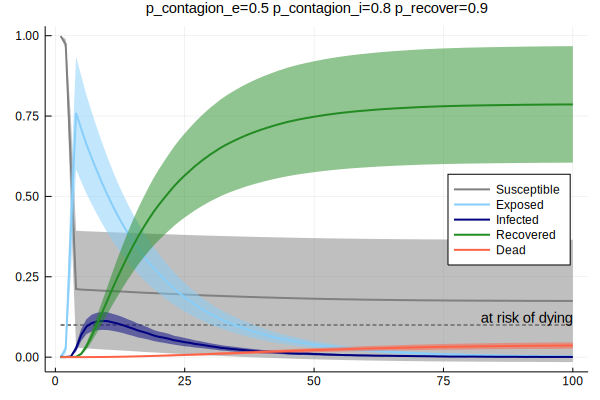

In [6]:
gr()
ttl = @sprintf "p_contagion_e=%.1f   p_contagion_i=%.1f   p_recover=%.1f" P_CONTAGION_E P_CONTAGION_I P_RECOVER;
seird_plot(data, 1.0 - P_RECOVER, ttl)